In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5
fig_height = 4
fig_format = :png
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using SymPy  # Para el cálculo simbólico de límites.
using Plots  # Para el dibujo de gráficas.
using Makie # Para obtener gráficos interactivos.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.
using Bessels  # Para definir funciones de Bessel.

In [3]:
a(n) = 1/2^n
an = [a(n) for n = 1:50]
cumsum(an)    

50-element Vector{Float64}:
 0.5
 0.75
 0.875
 0.9375
 0.96875
 0.984375
 0.9921875
 0.99609375
 0.998046875
 0.9990234375
 0.99951171875
 0.999755859375
 0.9998779296875
 ⋮
 0.999999999998181
 0.9999999999990905
 0.9999999999995453
 0.9999999999997726
 0.9999999999998863
 0.9999999999999432
 0.9999999999999716
 0.9999999999999858
 0.9999999999999929
 0.9999999999999964
 0.9999999999999982
 0.9999999999999991

In [4]:
a(n) = 1/2^n
A(n) = sum(a, 1:n)
An = [A(n) for n = 1:50]

50-element Vector{Float64}:
 0.5
 0.75
 0.875
 0.9375
 0.96875
 0.984375
 0.9921875
 0.99609375
 0.998046875
 0.9990234375
 0.99951171875
 0.999755859375
 0.9998779296875
 ⋮
 0.999999999998181
 0.9999999999990905
 0.9999999999995453
 0.9999999999997726
 0.9999999999998863
 0.9999999999999432
 0.9999999999999716
 0.9999999999999858
 0.9999999999999929
 0.9999999999999964
 0.9999999999999982
 0.9999999999999991

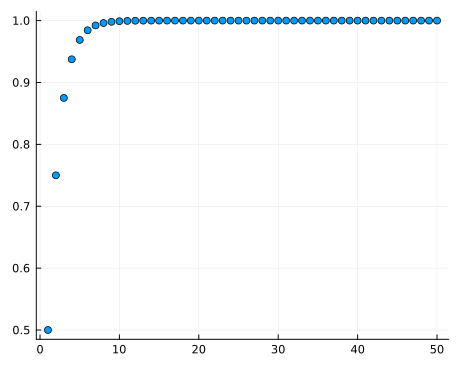

In [5]:
using Plots, LaTeXStrings
Plots.scatter(An, legend=false)

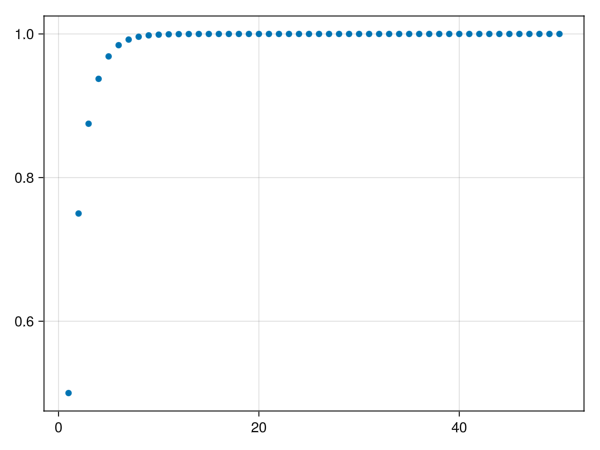

In [6]:
using GLMakie
Makie.scatter(An)

In [7]:
a(n) = 1/factorial(big(n))
an = [a(n) for n = 0:50]
An = cumsum(an)
decimales = round(abs(log10(abs(ℯ-last(An)))))
println(An)
println("Cifras del número e correctas: $decimales")

BigFloat[1.0, 2.0, 2.5, 2.666666666666666666666666666666666666666666666666666666666666666666666666666644, 2.708333333333333333333333333333333333333333333333333333333333333333333333333322, 2.716666666666666666666666666666666666666666666666666666666666666666666666666671, 2.718055555555555555555555555555555555555555555555555555555555555555555555555534, 2.718253968253968253968253968253968253968253968253968253968253968253968253968258, 2.718278769841269841269841269841269841269841269841269841269841269841269841269832, 2.718281525573192239858906525573192239858906525573192239858906525573192239858903, 2.718281801146384479717813051146384479717813051146384479717813051146384479717817, 2.718281826198492865159531826198492865159531826198492865159531826198492865159574, 2.718281828286168563946341724119501897279675057452835230613008390786168563946358, 2.718281828446759002314557870113425668981224536780092335647891203446759002314557, 2.718281828458229747912287594827277366959906642446324986007525690065372605

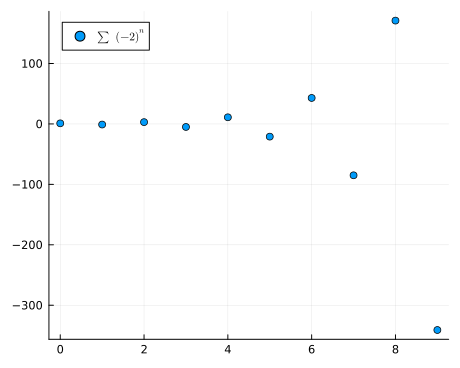

In [8]:
using Plots, LaTeXStrings
an = [(-2)^n for n = 0:9]
Plots.scatter(0:9, cumsum(an), label=L"$\sum (-2)^n$")

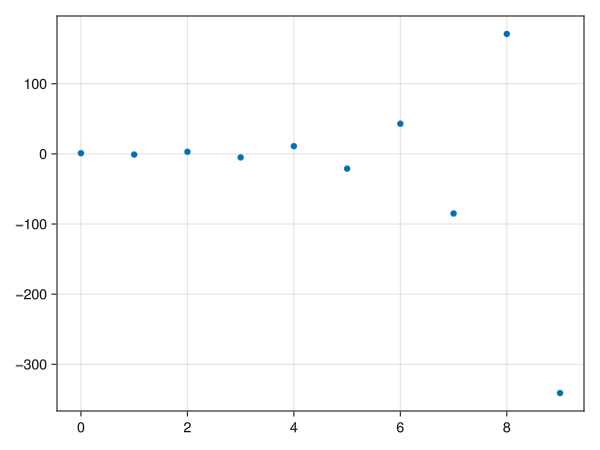

In [9]:
using GLMakie
an = [(-2)^n for n = 0:9]
Makie.scatter(0:9, cumsum(an))

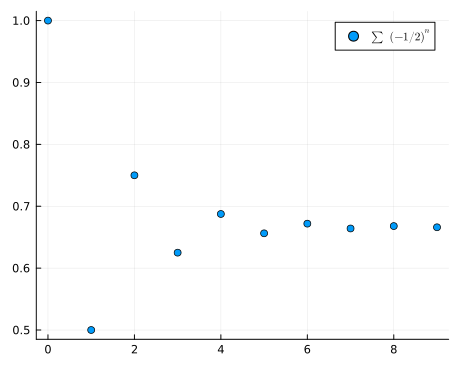

In [10]:
bn = [(-1/2)^n for n = 0:9]
Plots.scatter(0:9, cumsum(bn), label=L"$\sum (-1/2)^n$")

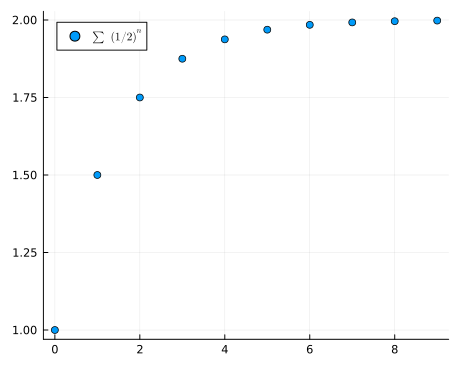

In [11]:
cn = [(1/2)^n for n = 0:9]
Plots.scatter(0:9, cumsum(cn), label=L"$\sum (1/2)^n$")

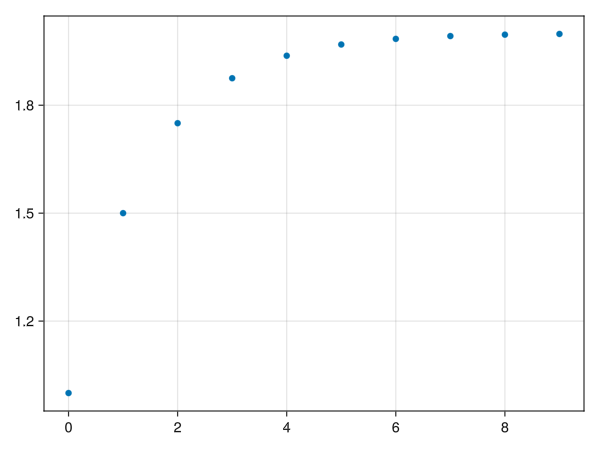

In [12]:
cn = [(1/2)^n for n = 0:9]
Makie.scatter(0:9, cumsum(cn))

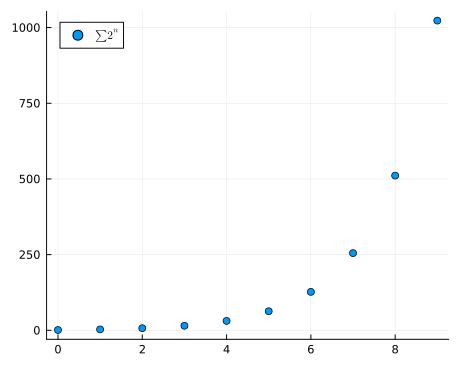

In [13]:
dn = [2^n for n = 0:9]
Plots.scatter(0:9, cumsum(dn), label=L"$\sum 2^n$")

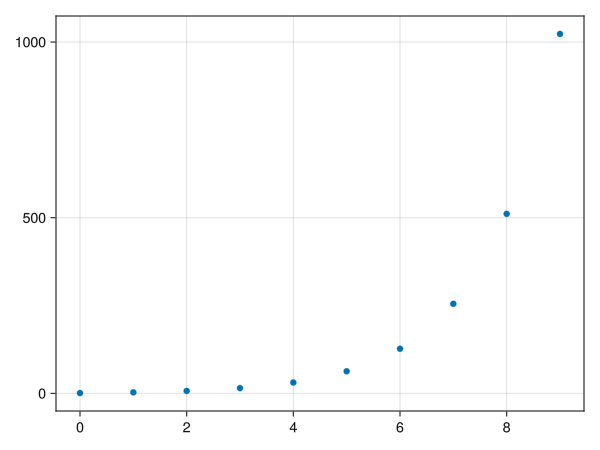

In [14]:
dn = [2^n for n = 0:9]
Makie.scatter(0:9, cumsum(dn))

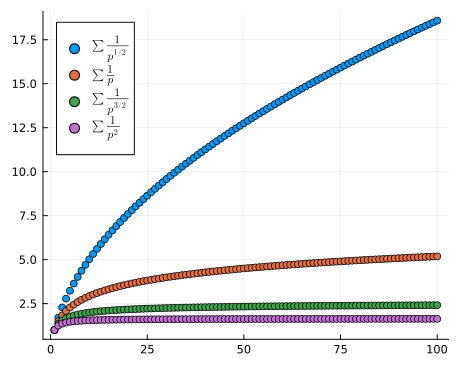

In [15]:
using Plots, LaTeXStrings
a(n,p) = 1/n^p
an = [a(n,1/2) for n = 1:100]
Plots.scatter(cumsum(an), label=L"$\sum \frac{1}{p^{1/2}}$", legend=:topleft)
bn = [a(n,1) for n = 1:100]
Plots.scatter!(cumsum(bn), label=L"$\sum \frac{1}{p}$")
cn = [a(n,3/2) for n = 1:100]
Plots.scatter!(cumsum(cn), label=L"$\sum \frac{1}{p^{3/2}}$")
dn = [a(n,2) for n = 1:100]
Plots.scatter!(cumsum(dn), label=L"$\sum \frac{1}{p^2}$")

In [16]:
error = 10^-10
a(n) = (-1)^n/factorial(n)
i = 0
while abs(a(i)) > error
    i += 1
end
println("Suma parcial de orden $i")
println("Aproximación: $(sum(a, 0:i))")

Suma parcial de orden 14


Aproximación: 0.36787944117216204


In [17]:
error = 10^-10
a(n) = (-1)^n*log(n)/n^2
i = 2
while abs(a(i)) > error
    i += 1
end
println("Suma parcial de orden $i")
println("Aproximación: $(sum(a, 2:i))")

Suma parcial de orden 357592


Aproximación: 0.10131657821350423


In [18]:
using SymPy
@syms x::real
a(n) = 1/n^2
error = 10^-4
i = 1
while integrate(a(x), (x, i, oo)) > error
    i += 1
end
println("Suma parcial de orden $i: $(sqrt(6*sum(a, 1:i)))")

Suma parcial de orden 10000: 3.1414971639472102


In [19]:
using SymPy
@syms x::real
a(n) = (-1)^n/(2n+1)    
error = 10^-4
i = 0
while abs(a(i)) > error
    i += 1
end
println("Suma parcial de orden $i: $(4*sum(a, 0:i))")

Suma parcial de orden 5000: 3.1417926135957948


In [20]:
using SymPy
@syms x::real
p(n) = SymPy.series(atan(x), x, 0, n+1).removeO()
for i = 1:5
    println("Suma funcional parcial de grado $(2i-1): $(p(2i-1))")
end

Suma funcional parcial de grado 1: x
Suma funcional parcial de grado 3: -x^3/3 + x
Suma funcional parcial de grado 5: x^5/5 - x^3/3 + x
Suma funcional parcial de grado 7: -x^7/7 + x^5/5 - x^3/3 + x
Suma funcional parcial de grado 9: x^9/9 - x^7/7 + x^5/5 - x^3/3 + x


In [21]:
@syms n::integer
c(n) = (-1)^(n-1)/(2n-1)
limit(abs(c(n)/c(n+1)), n => Inf)

1

In [22]:
error = 10^-8
i = 0
while abs(c(i)) >= error
    i += 1
end
println("Suma parcial de orden $i")
println("Aproximación de π: $(4*sum(c, 1:i))")

Suma parcial de orden 50000001


Aproximación de π: 3.141592673589794


In [23]:
using SymPy
@syms n::integer
c(n) = (-1)^n*1/(2^(2n)*factorial(n)^2)
limit(abs(c(n)/c(n+1)), n => Inf)

∞

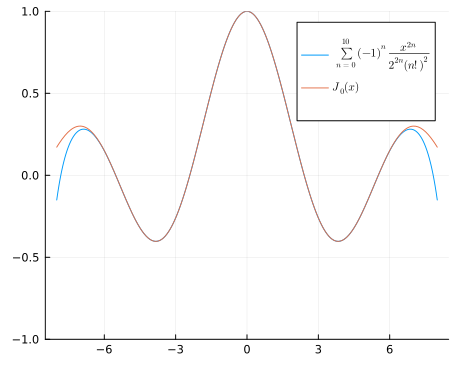

In [24]:
using Plots, LaTeXStrings, Bessels
@syms x::real
a(x,n) = (-1)^n/(2^(2n)*factorial(n)^2) * x^(2n)
N = 10
an = [a(x,n) for n=0:N]
An = sum(an)
Plots.plot(An, -8, 8,  ylims = (-1,1), label=L"$\sum_{n=0}^{10} (-1)^n\frac{x^{2n}}{2^{2n}(n!)^2}$")
Plots.plot!(besselj0, label = L"$J_0(x)$")

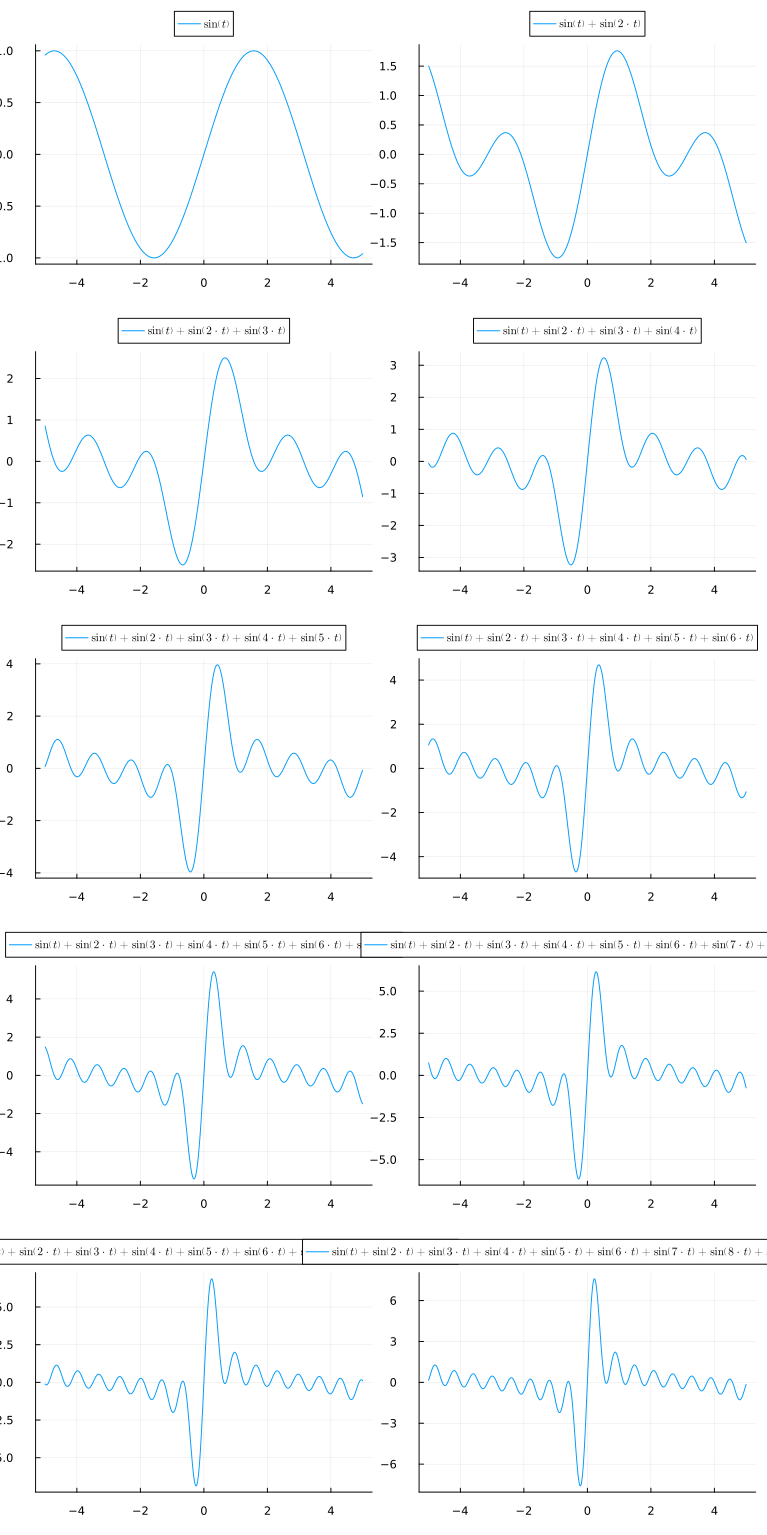

In [25]:
using Plots, SymPy, Latexify
@syms t::real
a(t,n) = sin(n*t)
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, Plots.plot(i, label=latexify(i), legend=:outertop))
end
Plots.plot(plots..., layout=(5,2), size=(800,1600))

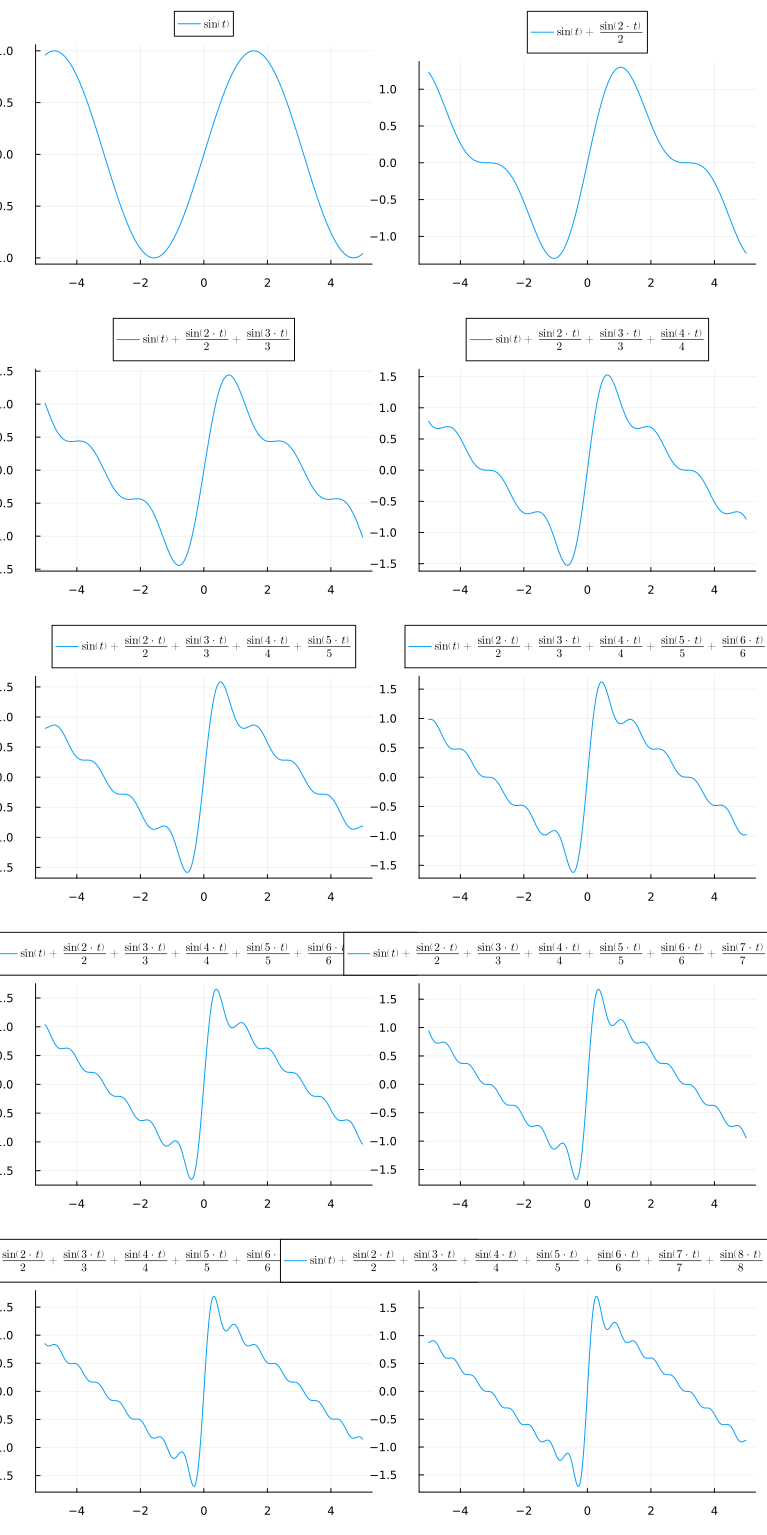

In [26]:
using Plots, SymPy, Latexify
@syms t::real
a(t,n) = sin(n*t)/n
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, Plots.plot(i, label=latexify(i), legend=:outertop))
end
Plots.plot(plots..., layout=(5,2), size=(800,1600))

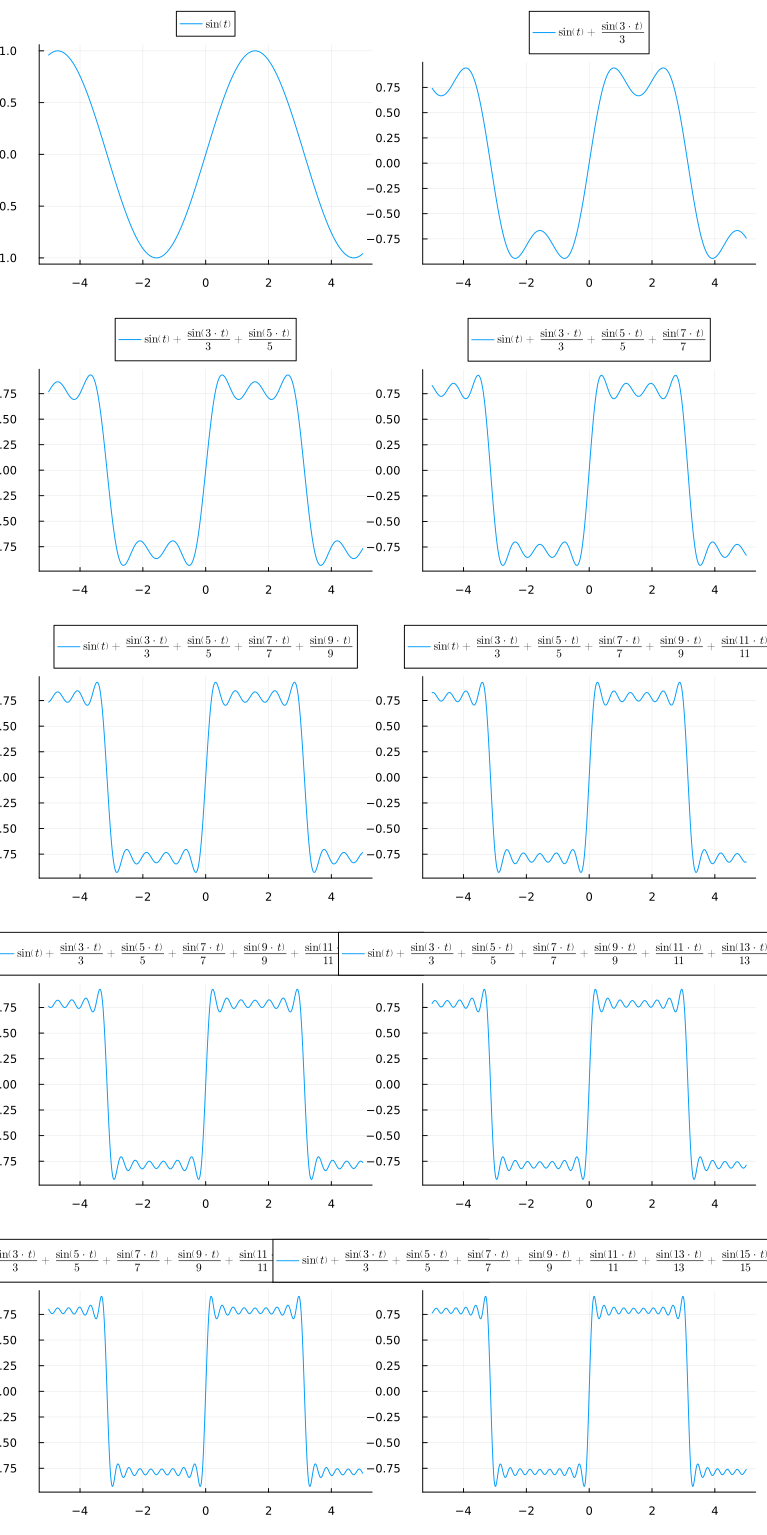

In [27]:
using Plots, SymPy, Latexify
@syms t::real
a(t,n) = sin((2n-1)t)/(2n-1)
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, Plots.plot(i, label=latexify(i), legend=:outertop))
end
Plots.plot(plots..., layout=(5,2), size=(800,1600))

In [28]:
#| echo: false
using QuizQuestions
nothing

In [29]:
#| echo: false
a(n) = 1/(big(n)*2^big(n))
numericq(sum(a, 1:100), 1e-20, hint="Introducir hasta 20 decimales")

QuizQuestions.Numericq(0.693147180559945309417232121458168832699520819900269428543870658882338310964522, 1.0e-20, "", "", "Introducir hasta 20 decimales", "", nothing)

In [30]:
#| echo: false
a(n) = factorial(big(n))/big(n)^big(n)
numericq(sum(a, 1:100), 1e-40, hint="Introducir hasta 40 decimales")

QuizQuestions.Numericq(1.879853862175258533486306145070960038819872853086289619594759148401709391879149, 1.0e-40, "", "", "Introducir hasta 40 decimales", "", nothing)

In [31]:
#| echo: false
choices = (L"$\sum \frac{\ln(n)}{n}$", L"$\sum \frac{n+1}{\sqrt{n^5}}$", L"$\sum \frac{e^{1/n}}{n}$", L"$\sum n!/n^n$", L"$\sum  \cos(1/n)$")
answers = [2,4]
multiq(choices, answers)

QuizQuestions.Multiq((L"$\sum \frac{n+1}{\sqrt{n^5}}$", L"$\sum \frac{e^{1/n}}{n}$", L"$\sum n!/n^n$", L"$\sum \frac{\ln(n)}{n}$", L"$\sum  \cos(1/n)$"), [1, 3], [1, 2, 3, 4, 5], (L"$\sum \frac{n+1}{\sqrt{n^5}}$", L"$\sum \frac{e^{1/n}}{n}$", L"$\sum n!/n^n$", L"$\sum \frac{\ln(n)}{n}$", L"$\sum  \cos(1/n)$"), "", "", "", false)

In [32]:
#| echo: false
error = 10^-50
a(n) = 1/(2^n*factorial(big(n)))
suma = a(0)
i = 0
while abs(suma-sqrt(big(ℯ))) > error
    i += 1
    suma += a(i)
end
numericq(i, 1)

QuizQuestions.Numericq(34, 1, "", "", "", "", nothing)

In [33]:
#| echo: false
using SymPy
@syms n::integer
c(n) = 1/(n*5^n)
l = limit(abs(c(n)/c(n+1)), n => Inf)
numericq(l, 1)

QuizQuestions.Numericq(5, 1, "", "", "", "", nothing)

In [34]:
#| echo: false
using SymPy
@syms n::integer
c(n) = 2^n/sqrt(n+3)
l = limit(abs(c(n)/c(n+1)), n => Inf)
numericq(l, 1)

QuizQuestions.Numericq(1/2, 1, "", "", "", "", nothing)

In [35]:
#| echo: false
using SymPy
@syms m::real g::real h::real
const R = 6371
error = 0.01
F(h) = m*g*R^2/(R+h)^2
aprox = SymPy.series(F(h), h, 0, 5).removeO()(h => 100) 
sol = float(abs((F(100) - aprox)/F(100)))
numericq(sol, 1e-20, hint="Introducir hasta 10 decimales")

QuizQuestions.Numericq(5.791045946020451010340048535323082600609948122789228285661991318830157818444988e-09, 1.0e-20, "", "", "Introducir hasta 10 decimales", "", nothing)

In [36]:
#| echo: false
a(n) = m*g*(n+1)*(-h/R)^n
sol = float((a(4)/F(h))(h => 100))
numericq(sol, 1, hint="Introducir hasta 10 decimales")

QuizQuestions.Numericq(3.130885415061650420328313643293932299331295133914225865652440275629736281754807e-07, 1, "", "", "Introducir hasta 10 decimales", "", nothing)

QuizQuestions.HotspotQ("img/series/graficas-series-fourier.png", (0, 0.5), (0.5, 1), "", "", "", nothing)
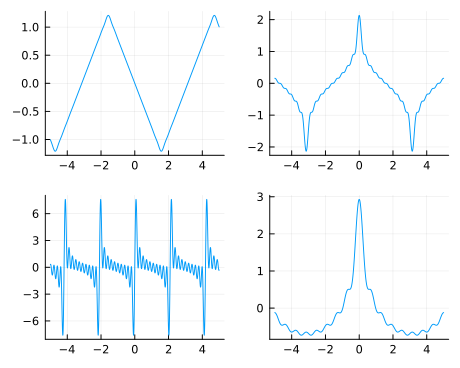

In [37]:
#| echo: false
using Plots, SymPy
@syms t::real
a(t,n) = (-1)^n*sin((2n-1)t)/(2n-1)^2
b(t,n) = cos((2n-1)t)/(2n-1)
c(t,n) = sin(3n*t)
d(t,n) = cos(n*t)/n
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
p1 = Plots.plot(An[N], legend=false)
bn = [b(t,n) for n=1:N]
Bn = cumsum(bn)
p2 = Plots.plot(Bn[N], legend=false)
cn = [c(t,n) for n=1:N]
Cn = cumsum(cn)
p3 = Plots.plot(Cn[N], legend=false)
dn = [d(t,n) for n=1:N]
Dn = cumsum(dn)
p4 = Plots.plot(Dn[N], legend=false)
l = @layout [a b; c d]
plt = Plots.plot(p1, p2, p3, p4, layout=l)
imgfile = "img/series/graficas-series-fourier.png"
savefig(plt, imgfile)
hotspotq(imgfile, (0,1/2), (1/2, 1))